In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
interventions1 = pd.read_parquet('data/interventions1.parquet')

In [3]:
interventions1.head(5)

,Mission ID,Service Name,PostalCode permanence,CityName permanence,StreetName permanence,HouseNumber permanence,Latitude permanence,Longitude permanence,Permanence short name,Permanence long name,...,Unavailable time,Name destination hospital,PostalCode destination hospital,CityName destination hospital,StreetName destination hospital,HouseNumber destination hospital,Calculated travelTime destinatio,Calculated Distance destination,Number of transported persons,Abandon reason
0,10221520001,HA UR MECH AZ St Maarten,2800.0,Mechelen (Mechelen),Liersesteenweg,None,51.051020,4.478030,AAMECH01A,ZW MECHELEN 1,...,NaN,None,None,None,None,None,NaN,NaN,NaN,Verzorgd ter plaatse
1,10221520002,BA KAPE AMBUCE,2950.0,Kapellen (Kapellen),Essenhoutstraat,None,51.312075,4.424398,AAKAPE01A,ZW KAPELLEN 1,...,NaN,HA UR ANTW Jan Palfijn,None,Antwerpen (Merksem),Lange Bremstraat,None,678.0,11743.0,1.0,None
2,10221520002,HA UR ANTW Stuivenberg,2060.0,Antwerpen (Antwerpen),Lange Beeldekensstraat,None,51.222490,4.436290,UAANTW01A,MUG ANTWERPEN 1,...,NaN,None,None,None,None,None,NaN,NaN,NaN,None
3,10221520004,BA ANTW [Borgerhout] AMBUCE,2140.0,Antwerpen (Borgerhout),Gijselsstraat,None,51.215620,4.443920,AAANTW07A,ZW ANTWERPEN 7,...,NaN,None,None,None,None,None,NaN,NaN,NaN,Zonder patient
4,10221520005,BA WIJN AMBUCE,2110.0,Wijnegem (Wijnegem),Bijkhoevelaan,None,51.233550,4.493180,AAWIJN01A,ZW WIJNEGEM 1,...,NaN,HA UR ANTW Jan Palfijn,None,Antwerpen (Merksem),Lange Bremstraat,None,530.0,5468.0,1.0,None


In [4]:
print(interventions1.columns)

Index(['Mission ID', 'Service Name', 'PostalCode permanence',
       'CityName permanence', 'StreetName permanence',
       'HouseNumber permanence', 'Latitude permanence', 'Longitude permanence',
       'Permanence short name', 'Permanence long name', 'Vector type',
       'EventType Firstcall', 'EventLevel Firstcall', 'EventType Trip',
       'EventLevel Trip', 'PostalCode intervention', 'CityName intervention',
       'Latitude intervention', 'Longitude intervention',
       'Province intervention', 'T0', 'T1', 'T1confirmed', 'T2', 'T3', 'T4',
       'T5', 'T6', 'T7', 'T9', 'Intervention time (T1Reported)',
       'Intervention time (T1Confirmed)', 'Waiting time',
       'Intervention duration', 'Departure time (T1Reported)',
       'Departure time (T1Confirmed)', 'Unavailable time',
       'Name destination hospital', 'PostalCode destination hospital',
       'CityName destination hospital', 'StreetName destination hospital',
       'HouseNumber destination hospital', 'Calculated t

0         51.12496
1         51.30626
2         51.30626
3         51.23878
4         51.25071
            ...   
200622    50.16330
200623    50.45373
200624    50.40300
200625    50.45494
200626    50.45494
Name: latitudes, Length: 200627, dtype: float64


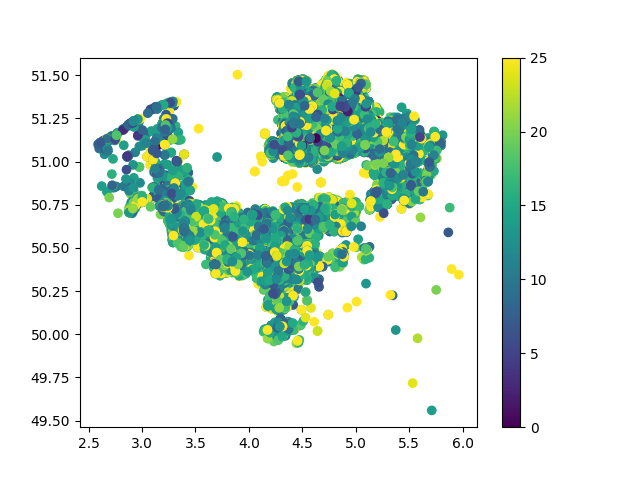

In [5]:
latitudes = np.array(interventions1["Latitude intervention"].tolist())
longitudes = np.array(interventions1["Longitude intervention"].tolist())
waiting = interventions1["Waiting time"]

interventions1.loc[interventions1["Latitude intervention"] > 52, "latitudes"] = interventions1["Latitude intervention"] / 10
interventions1.loc[interventions1["Latitude intervention"] <= 52, "latitudes"] = interventions1["Latitude intervention"]
print(interventions1["latitudes"])

temp_waiting = waiting[np.logical_not(np.logical_or(np.logical_or(np.isnan(latitudes), np.isnan(longitudes)), np.isnan(waiting)))]
temp_latitudes = latitudes[np.logical_not(np.logical_or(np.logical_or(np.isnan(latitudes), np.isnan(longitudes)), np.isnan(waiting)))]
temp_longitudes = longitudes[np.logical_not(np.logical_or(np.logical_or(np.isnan(latitudes), np.isnan(longitudes)), np.isnan(waiting)))]
latitudes = temp_latitudes
longitudes = temp_longitudes
waiting = temp_waiting
latitudes[latitudes>52] = latitudes[latitudes>52]/10
latitudes[latitudes<48] = latitudes[latitudes<48]*10

longitudes[longitudes>200] = longitudes[longitudes>200]/10
longitudes[longitudes>20] = longitudes[longitudes>20]/10

waiting[waiting>25]=25
plt.scatter(longitudes, latitudes, c=waiting)

plt.colorbar()
plt.show()


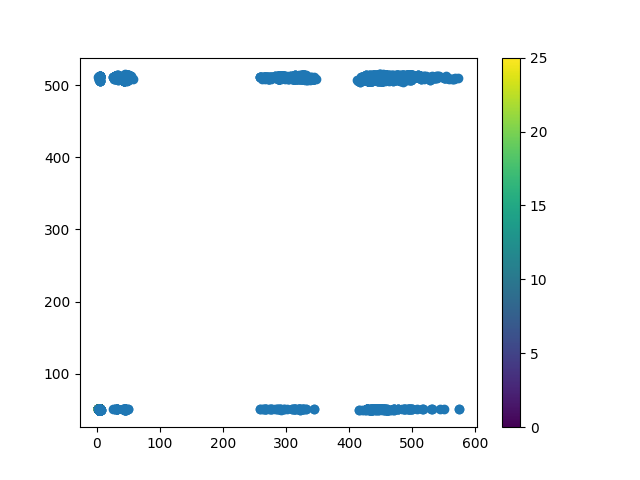

In [6]:
plt.scatter(interventions1["Longitude intervention"], interventions1["Latitude intervention"])
plt.show()